# Análisis y predicción de generación de energía para una planta solar

http://balamfund.com/planta-solar-san-luis-potosi/

Planta ubicada en el municipio de Villa de Arista, Estado de San Luis Potosí.
Registrado bajo el esquema de autoabastecimiento, da energía limpia a grupos privados a través de un contrato de compraventa de energía a largo plazo.
Incluye más de 100 mil paneles fotovoltaicos, a través de los cuales se generará alrededor de 90gWh al año, equivalente al consumo eléctrido de más de 30,000 hogares, además de evitar la emisión de más de 60,000 toneladas de CO2 a la atmósfera cada año.

## Acerca de los datos

Se cuenta con las siguientes variables iniciales.

1. Generación
2. Temperatura
3. Probabilidad de Lluvia
4. Humedad Relativa
5. Velocidad del Viento
6. Dirección del Viento
7. Cobertura de Nubes
8. Índice UV
9. Condición del Cielo (clasificatoria)
10. Dirección del Viento (clasificatoria)
11. Velocidad de Ráfaga
12. Precipitación
13. Temperatura del Punto de Rocío

Para el conjunto de variables, vamos a utilizar las pruebas de **Augmented Dickey-Fuller (ADF)** y de **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** para revisar la estacionalidad.

También, para mayor apreciación de las gráficas, graficaremos 30 días (720 registros).

In [22]:
#Importaciones iniciales
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [23]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
datosGeneracion_sel = datosGeneracion.copy()
datosGeneracion_sel = datosGeneracion_sel.drop(columns = ['Fecha', 'DesCondCielo', 'DesDirViento'])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_sel.columns, index=datosGeneracion_sel.index)
datosGeneracion_scaled.head(4)

,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,Generacion,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000053,0.043478,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000105,0.086957,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000158,0.130435,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
datosGeneracion_dropna = datosGeneracion_scaled.dropna()
datosGeneracion_dropna.head(4)

,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,Generacion,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001263,0.000000,0.0,...,0.500199,0.447368,0.527950,0.500000,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
25,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001315,0.043478,0.0,...,0.500199,0.473684,0.552795,0.494048,0.584171,0.494949,0.444444,0.494208,0.563265,0.507246
26,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001368,0.086957,0.0,...,0.500199,0.473684,0.534161,0.505952,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
27,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001420,0.130435,0.0,...,0.500199,0.447368,0.503106,0.500000,0.584171,0.494949,0.444444,0.494208,0.563265,0.492754


In [28]:
y = datosGeneracion_dropna[['Generacion_diff']]
x = datosGeneracion_dropna[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [38]:
from numpy.linalg import eig
valores, vectores = eig(x.cov())

vector_azul = vectores[: 0]
vector_rojo = vectores[: 1]

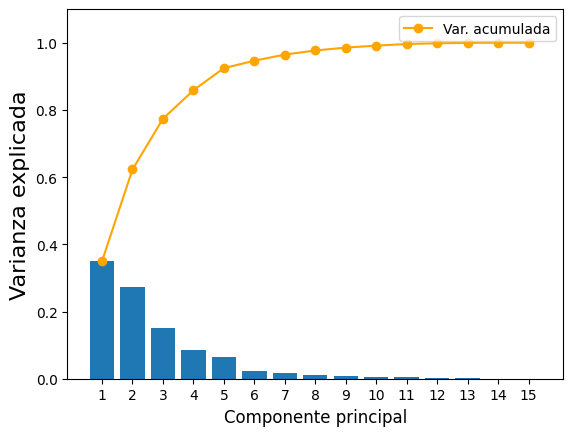

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
datos = pca.fit_transform(x)

plt.figure()
plt.bar(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, 16),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [45]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca.components_,
  columns = x.columns,
  index = ['pca1', 'pca2', 'pca3','pca4', 'pca5', 'pca6','pca7', 'pca8', 'pca9','pca10', 'pca11', 'pca12', 'pca13', 'pca14','pca15']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
CoberturaNubes,0.611825,0.400882,0.356248,-0.545924,-0.192377,0.034830,0.002226,0.016640,-0.007049,0.005927,0.037767,0.001293,-0.000534,-0.001013,-0.000534
CodCondCielo,0.554651,0.366207,-0.242913,0.606950,0.354691,0.035775,0.021431,-0.051318,-0.018289,0.006491,-0.017024,0.002971,0.000884,0.001668,0.001156
NumSemana,0.360657,-0.588830,0.138139,0.029848,0.085918,-0.016479,0.003087,-0.001832,-0.006273,0.003079,-0.002026,-0.001431,-0.000575,0.006748,0.703893
NumDiaAnio,0.353739,-0.580870,0.152141,0.036609,0.090815,-0.017684,0.006664,-0.004405,-0.006774,-0.001701,-0.001563,-0.000433,-0.000037,-0.006810,-0.710106
HumedadRelativa_diff,0.038502,0.033202,0.016175,0.068162,-0.119754,-0.755157,-0.007789,-0.110334,0.321279,0.176259,0.041728,-0.509418,-0.011004,0.003716,-0.000201
ProbabilidadLluvia_diff,0.020596,0.018788,-0.003719,0.046146,0.032446,-0.177614,-0.128636,0.966870,-0.079673,-0.036795,0.070322,0.000308,-0.021043,0.001796,-0.001482
DPT_diff,0.012751,0.012725,0.008464,0.024291,-0.065161,-0.359617,0.014876,-0.031533,-0.041414,0.564087,-0.177273,0.713620,0.059886,0.007209,-0.001108
VelocidadRafaga_diff,0.003595,0.003424,-0.001593,-0.018811,0.051502,-0.013770,-0.732724,-0.092831,-0.047106,-0.035756,0.015141,-0.017564,0.668352,0.023283,-0.001437
VelocidadViento_diff,0.003474,0.003693,-0.000796,-0.013221,0.036907,-0.027161,-0.656047,-0.113341,-0.059964,0.012438,-0.003293,0.046907,-0.740224,-0.023654,-0.001413
Precipitacion_diff,0.000731,0.000652,-0.000237,0.001939,0.000752,-0.006871,-0.002123,0.001800,0.009981,-0.003736,-0.002979,0.006745,0.033350,-0.999283,0.009613
